# Name: Deep Walke
# BT19CSE122

# Assignment 2: Graph Theory

In [95]:
import matplotlib.pyplot as plt
import time
from prettytable import PrettyTable

In [96]:
# reading the dataset
filename='Dataset_assignment-2.txt'
with open(filename) as f:
    points = f.readlines()

for i in range(len(points)):
    points[i] = points[i].split()
    points[i] = [float(x) for x in points[i]]

# giving each point a unique node number
graph = {}
for i in range(len(points)):
    graph[i] = points[i]

print(graph)


{0: [0.10939309992822593, 0.08540944605400377], 1: [0.08257056589315302, 0.10179643490510727], 2: [0.08498980564609883, 0.11364122368069912], 3: [0.11461114193975777, 0.11552402271516482], 4: [0.09735596050211873, 0.09548403816561275], 5: [0.08661201543909372, 0.11308376585550771], 6: [0.1073481288254181, 0.11021330754420668], 7: [0.07801081730421248, 0.06810454086466368], 8: [0.10277973436298088, 0.11647434064820172], 9: [0.07339804391235821, 0.1078335519818581], 10: [0.11325452752755462, 0.10404663937378625], 11: [0.1273278386781513, 0.10836496591740674], 12: [0.10534147759505744, 0.13110054873722296], 13: [0.06898127393954798, 0.06346945806802406], 14: [0.10414520023820327, 0.10185867962316415], 15: [0.09482702879554915, 0.10603072056048626], 16: [0.10590385064004555, 0.14671170907858727], 17: [0.09145486727290403, 0.08445999826012236], 18: [0.13583113939077163, 0.09458095912800595], 19: [0.11555679696075509, 0.1368193826144829], 20: [0.12031639663697646, 0.11357504238950059], 21: [

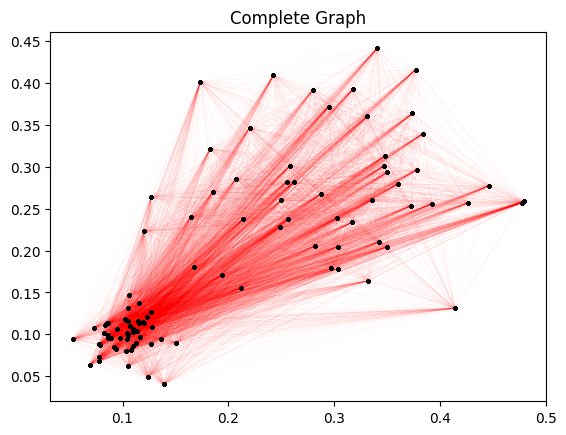

In [97]:
plt.title('Complete Graph')
for i in range(len(points)):
    for j in range(len(points)):
        if i!=j:
            xx=[points[i][0],points[j][0]]
            yy=[points[i][1],points[j][1]]
            plt.plot(xx,yy,'o',color='black',markersize=2)
            plt.plot(xx,yy,color='red',linewidth=0.01)
plt.show()

# 1. Let G = (V, E) be the complete weighted undirected graph of the given dataset where vertex set V denotes the points and edge set E is the weighted edges between every pair of points. The weight of an edge (u, v) is the Euclidean distance between points u and v. Compute the minimum spanning tree (MST) using prim’s on graph G.

In [98]:
# function to calculate distance between any two points
def calculate_distance(point1, point2):
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

In [99]:

# As the graph is complete, we are considering adjacency_matrix
adjacency_matrix = [[0 for i in range(len(points))] for j in range(len(points))]
for i in range(len(points)):
    for j in range(len(points)):
        if i != j:
            adjacency_matrix[i][j]=calculate_distance(graph[i], graph[j])


# printing the adjacency matrix
# for i in range(len(points)):
#     for j in range(len(points)):
#         print(i ," -> ", j, " : ", adjacency_matrix[i][j])


In [100]:
# prims algorithm
def prims(graph, start):
    visited = [start]
    path = []
    while len(visited) != len(graph):
        minimum = float('inf')
        for i in visited:
            for j in range(len(graph)):
                if j not in visited:
                    # considering the minimum edge
                    if graph[i][j] < minimum:
                        minimum = graph[i][j]
                        min_i = i
                        min_j = j
        visited.append(min_j)
        path.append([min_i, min_j])
    return path

In [101]:
start_time = time.time()
prims_path = prims(adjacency_matrix, 0)
print("Time taken by prims algorithm: ", time.time() - start_time)

Time taken by prims algorithm:  0.232957124710083


In [102]:
print(prims_path)

[[0, 40], [40, 34], [0, 42], [42, 31], [31, 10], [10, 21], [21, 26], [26, 6], [6, 27], [27, 8], [8, 30], [21, 14], [14, 35], [35, 36], [36, 4], [4, 24], [24, 44], [44, 48], [48, 1], [1, 37], [37, 2], [2, 5], [6, 3], [3, 45], [45, 39], [39, 20], [39, 47], [47, 22], [20, 11], [34, 43], [43, 17], [14, 33], [33, 15], [37, 9], [44, 38], [38, 46], [31, 23], [23, 18], [30, 12], [12, 19], [19, 16], [46, 28], [28, 7], [7, 13], [18, 25], [34, 32], [32, 29], [29, 49], [9, 41], [22, 75], [75, 70], [70, 78], [75, 96], [96, 71], [71, 90], [71, 57], [57, 87], [87, 72], [72, 61], [61, 82], [82, 88], [82, 63], [88, 59], [59, 55], [55, 89], [89, 86], [86, 95], [86, 80], [80, 76], [80, 62], [89, 73], [73, 74], [74, 69], [69, 79], [79, 56], [74, 60], [74, 64], [64, 81], [81, 77], [77, 52], [89, 53], [53, 58], [52, 97], [97, 51], [60, 65], [65, 85], [85, 91], [91, 92], [92, 94], [94, 93], [93, 66], [90, 84], [96, 50], [50, 83], [84, 67], [85, 98], [98, 54], [66, 68], [62, 99]]


# Minimum Spanning Tree

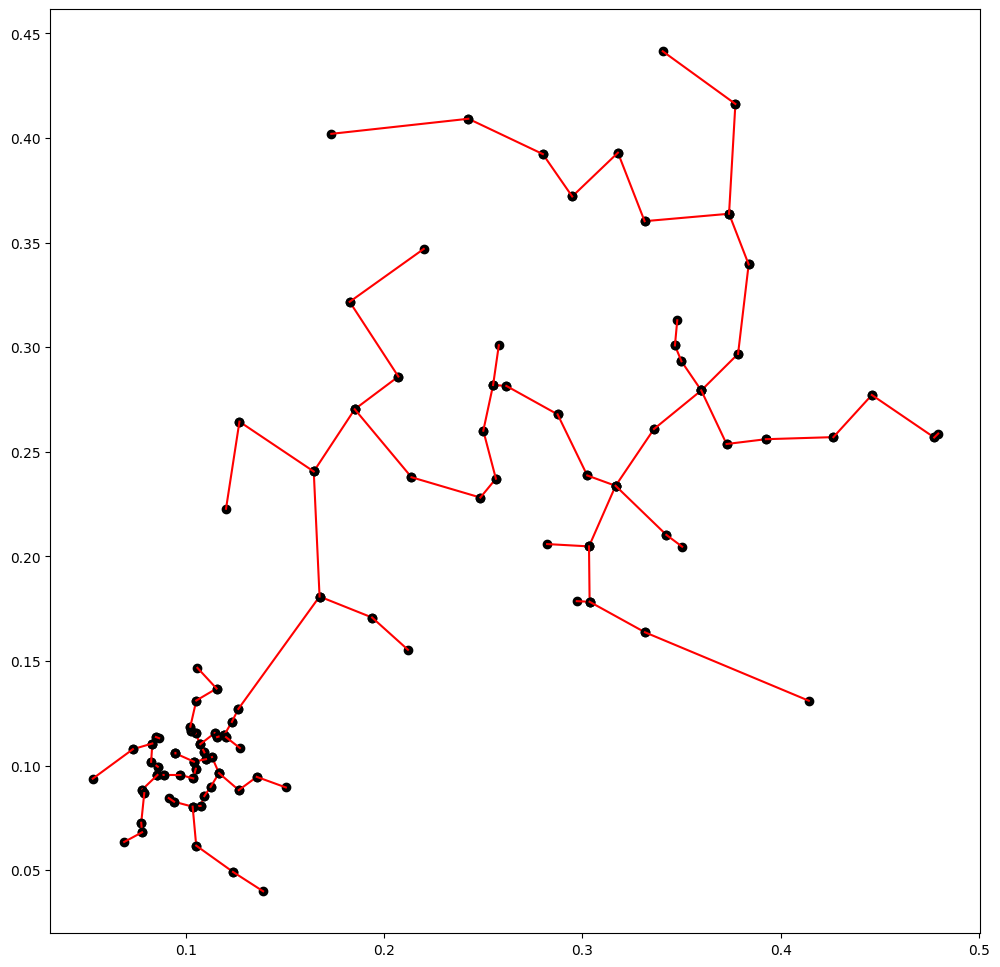

In [103]:
# plt.title('Minimum Spanning Tree')
plt.figure(figsize=(12,12))
for i in range(len(prims_path)):
    xx = [graph[prims_path[i][0]][0], graph[prims_path[i][1]][0]]
    yy = [graph[prims_path[i][0]][1], graph[prims_path[i][1]][1]]
       
    plt.plot(xx, yy, 'o', color='black')
    plt.plot(xx,yy,color='red')

# 2. Compute and display the t-round of MST-neighborhood. Show the time duration (in second) to compute MST-neighborhood graph.

In [104]:
# function to set the previous prims path edges weight to infinity
def t_MST(prims_path):
    for i in prims_path:
        adjacency_matrix[i[0]][i[1]] = float('inf')
    

In [105]:
# considering t=5
adjacency_matrix_copy=adjacency_matrix
t=5
start_time = time.time()
prims_path_list = []
prims_path_list.append(prims_path)
for i in range(t):
    t_MST(prims_path_list[i])
    prims_path = prims(adjacency_matrix, 0)
    prims_path_list.append(prims_path)

end_time=time.time()

In [106]:
print("Time taken ", end_time - start_time)

Time taken  1.162410020828247


# MST-Neighbourhood

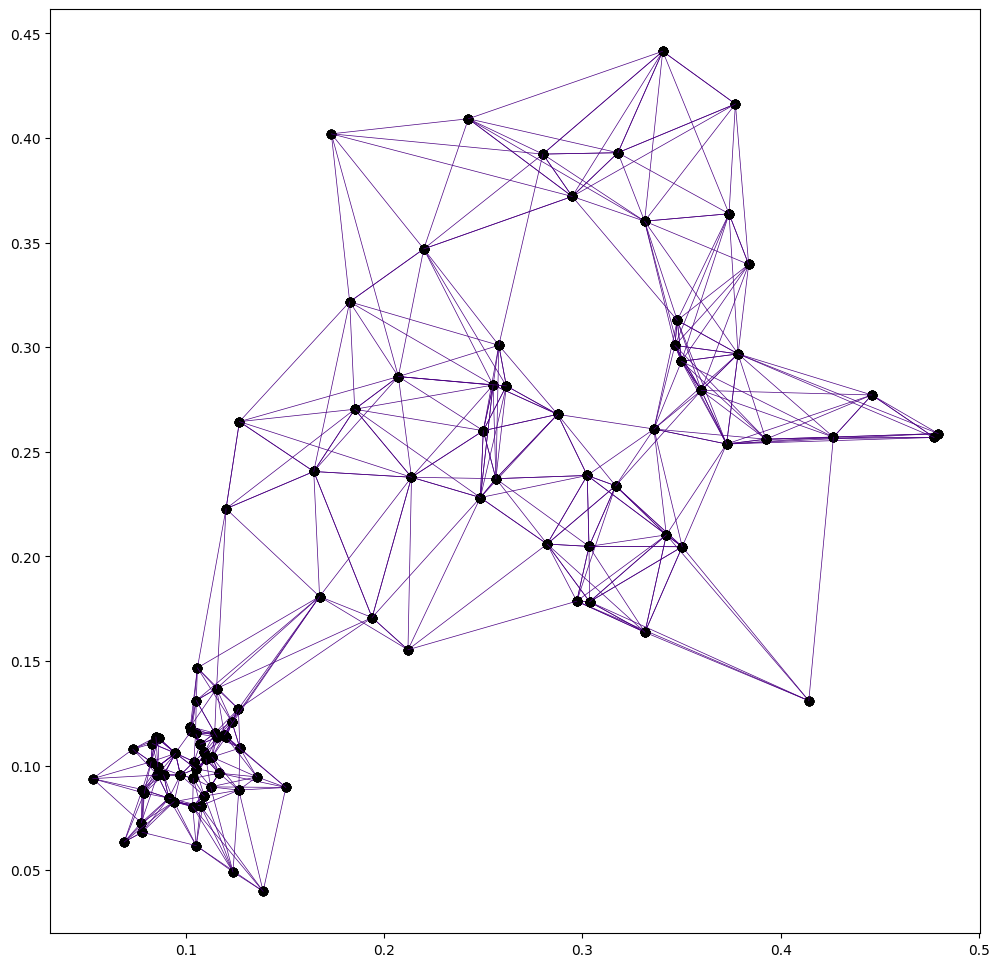

In [107]:
# plot prims_path_list
plt.figure(figsize=(12,12))
for i in range(len(prims_path_list)):
    for j in range(len(prims_path_list[i])):
        xx = [graph[prims_path_list[i][j][0]][0], graph[prims_path_list[i][j][1]][0]]
        yy = [graph[prims_path_list[i][j][0]][1], graph[prims_path_list[i][j][1]][1]]
        plt.plot(xx, yy, 'o', color='black')
        plt.plot(xx,yy,color='indigo',linewidth=0.5)

# 3. Compute the shortest path from data point-1 to all other points of the dataset. Show the time duration (in second) to compute the shortest paths.

In [108]:
# restoring the adjacency matrix
adjacency_matrix=adjacency_matrix_copy

In [110]:
# print(adjacency_matrix)

In [111]:
distance = [float('inf') for i in range(len(points))]

distance[0] = 0

# djisktra algorithm for calculating the shortest path
def djisktra(adjacency_matrix, start):
    visited = [start]
    path = []
    while len(visited) != len(adjacency_matrix):
        min_distance = float('inf')
        for i in visited:
            for j in range(len(adjacency_matrix)):
                if j not in visited:
                    if adjacency_matrix[i][j] < min_distance:
                        min_distance = adjacency_matrix[i][j]
                        start = i
                        end = j
        visited.append(end)
        path.append([start, end])
        distance[end] = min_distance
    

In [112]:
djisktra(adjacency_matrix, 0)

In [113]:

print("Shortest path from node 0 to every other node")
table = PrettyTable()
table.field_names = ["Node", "Old Cost", "New Cost"]
for i in range(len(adjacency_matrix)):
    table.add_row([i, adjacency_matrix[0][i], distance[i]])
print(table)

Shortest path from node 0 to every other node
+------+----------------------+----------------------+
| Node |       Old Cost       |       New Cost       |
+------+----------------------+----------------------+
|  0   |          0           |          0           |
|  1   | 0.03143217675677004  | 0.012905556069557182 |
|  2   | 0.03731694038614733  | 0.01423902353690911  |
|  3   | 0.030563306266093937 | 0.010593682309085323 |
|  4   | 0.015696819161181617 | 0.015696819161181617 |
|  5   | 0.03584474559788217  | 0.013665369325009441 |
|  6   | 0.024888018234413316 | 0.005694618337150921 |
|  7   | 0.03583723491433883  | 0.02175711922878626  |
|  8   | 0.03176104973467027  | 0.013126870395444358 |
|  9   | 0.04240854376477794  | 0.017469334068205812 |
|  10  | 0.019033013370031604 | 0.008538930960762971 |
|  11  | 0.029130924225420022 | 0.01472093851895478  |
|  12  | 0.04587038813809089  | 0.020391149832992648 |
|  13  | 0.04598346172880116  | 0.03166909905105534  |
|  14  | 0.01726608